In [32]:
import pandas as pd
import plotly.express as px

# Metricas de Grupo FB

In [33]:
miembros=pd.read_excel('miembros.xlsx')
miembros=miembros.drop_duplicates()
miembros

Unnamed: 0       Fecha  Miembros totales  Miembros pendientes  \
0             0  2022-02-25              4595                  116   
1             1  2022-02-26              4618                   93   
2             2  2022-02-27              4618                   93   
3             3  2022-02-28              4618                   93   
4             4  2022-03-01              4618                   93   
..          ...         ...               ...                  ...   
100         100  2022-06-05              5229                  295   
101         101  2022-06-06              5241                  309   
102         102  2022-06-07              5263                  313   
103         103  2022-06-08              5362                  347   
104         104  2022-06-09              5373                  380   

     Solicitudes de miembros aprobadas  Solicitudes de miembros rechazadas  \
0                                    0                                   0   
1                                   23                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   
..                                 ...                                 ...   
100                                 15                                   0   
101                                 12                                   0   
102                                 24                                   0   
103                                 99                                   0   
104                                 11                                   0   

     Publicaciones  Comentarios  Reacciones  Miembros activos  Fecha de corte  
0                0            0           0                 1           30322  
1                0            0           0                 4           30322  
2                0            0           0                 5           30322  
3                1            0          24               368           30322  
4                1            7          52              1212           30322  
..             ...          ...         ...               ...             ...  
100              0            0           1                37           60922  
101              0            0           5                29           60922  
102              1            1          25              1011           60922  
103              1           55         115              1575           60922  
104              0            5          19               414           60922  

[105 rows x 11 columns]

In [34]:
miembros['Fecha']= pd.to_datetime(miembros['Fecha'])
miembros['Fecha'].value_counts()

2022-02-25    1
2022-04-19    1
2022-05-13    1
2022-05-12    1
2022-05-11    1
             ..
2022-03-29    1
2022-03-28    1
2022-03-27    1
2022-03-26    1
2022-06-09    1
Name: Fecha, Length: 105, dtype: int64

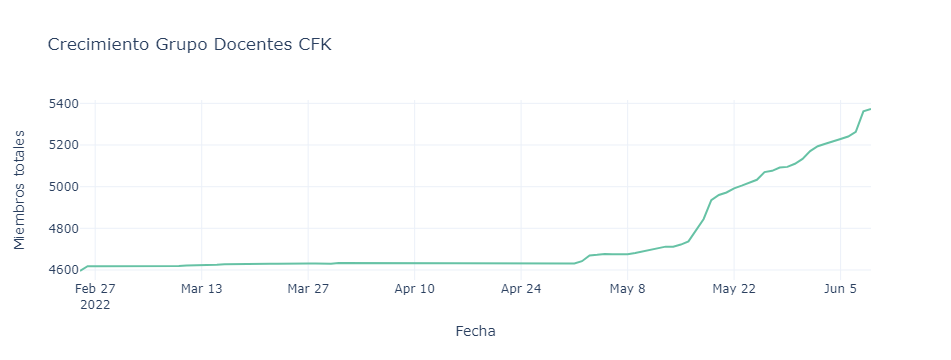

In [35]:
fig1=px.line(miembros,x='Fecha',y='Miembros totales',template="plotly_white",color_discrete_sequence=px.colors.qualitative.Set2, title='Crecimiento Grupo Docentes CFK')
fig1.show()

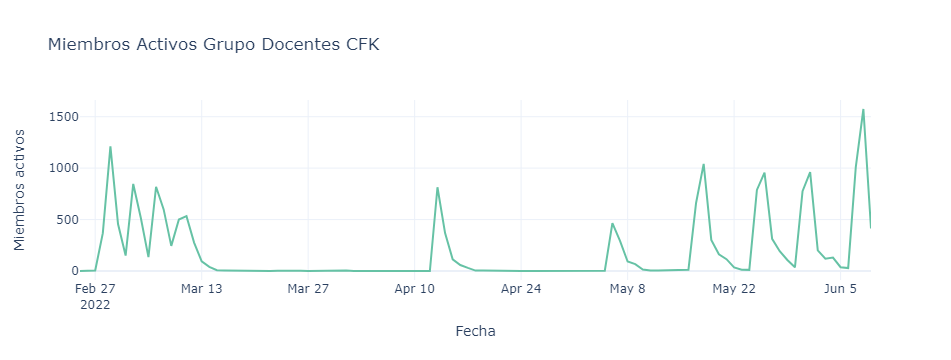

In [39]:
fig2=px.line(miembros,x='Fecha',y='Miembros activos',template="plotly_white",color_discrete_sequence=px.colors.qualitative.Set2, title='Miembros Activos Grupo Docentes CFK')
fig2.show()

In [42]:
metricas_='''Publicaciones	Comentarios	Reacciones'''
metricas_g = metricas_.split('	')
metricas_g

['Publicaciones', 'Comentarios', 'Reacciones']

In [52]:
metricas_grupo = miembros.loc[:,['Fecha']+ metricas_g]
metricas_grupo

Fecha  Publicaciones  Comentarios  Reacciones
0   2022-02-25              0            0           0
1   2022-02-26              0            0           0
2   2022-02-27              0            0           0
3   2022-02-28              1            0          24
4   2022-03-01              1            7          52
..         ...            ...          ...         ...
100 2022-06-05              0            0           1
101 2022-06-06              0            0           5
102 2022-06-07              1            1          25
103 2022-06-08              1           55         115
104 2022-06-09              0            5          19

[105 rows x 4 columns]

In [53]:
metricas_grupo = metricas_grupo.melt(id_vars='Fecha')
metricas_grupo

Fecha       variable  value
0   2022-02-25  Publicaciones      0
1   2022-02-26  Publicaciones      0
2   2022-02-27  Publicaciones      0
3   2022-02-28  Publicaciones      1
4   2022-03-01  Publicaciones      1
..         ...            ...    ...
310 2022-06-05     Reacciones      1
311 2022-06-06     Reacciones      5
312 2022-06-07     Reacciones     25
313 2022-06-08     Reacciones    115
314 2022-06-09     Reacciones     19

[315 rows x 3 columns]

In [54]:
pivot=metricas_grupo.pivot_table(index=['Fecha', 'variable'],values='value').reset_index()
pivot=pivot.rename(columns={'value':'Cant', 'variable':'Tipo de interacción'})
pivot

Fecha Tipo de interacción  Cant
0   2022-02-25         Comentarios     0
1   2022-02-25       Publicaciones     0
2   2022-02-25          Reacciones     0
3   2022-02-26         Comentarios     0
4   2022-02-26       Publicaciones     0
..         ...                 ...   ...
310 2022-06-08       Publicaciones     1
311 2022-06-08          Reacciones   115
312 2022-06-09         Comentarios     5
313 2022-06-09       Publicaciones     0
314 2022-06-09          Reacciones    19

[315 rows x 3 columns]

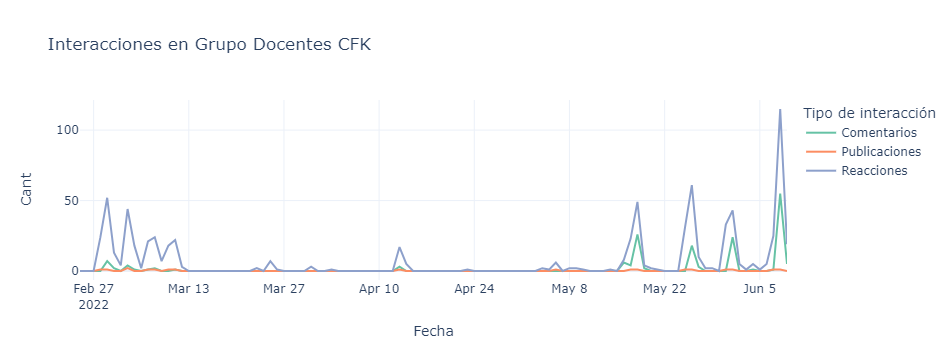

In [55]:
fig4=px.line(pivot,x='Fecha',y='Cant',color='Tipo de interacción',template="plotly_white",color_discrete_sequence=px.colors.qualitative.Set2, title='Interacciones en Grupo Docentes CFK')
fig4.show()

In [21]:
dias_act=pd.read_excel('dias_act.xlsx')
dias_act=dias_act.drop_duplicates()
dias_act

Unnamed: 0 Días con más actividad  \
0             0                  Lunes   
1             1                 Martes   
2             2              Miércoles   
3             3                 Jueves   
4             4                Viernes   
..          ...                    ...   
100         100              Miércoles   
101         101                 Jueves   
102         102                Viernes   
103         103                 Sábado   
104         104                Domingo   

     Publicaciones, comentarios y reacciones  Fecha de corte  
0                                         25           30322  
1                                         60           30322  
2                                         15           30322  
3                                          4           30322  
4                                          0           30322  
..                                       ...             ...  
100                                      171           60922  
101                                       24           60922  
102                                        1           60922  
103                                        6           60922  
104                                        1           60922  

[105 rows x 4 columns]